In [44]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Example 1

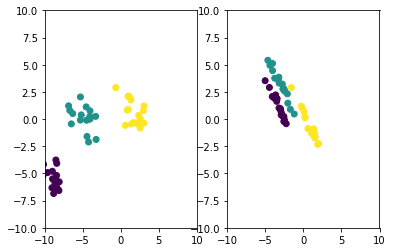

In [45]:
d1,y = make_blobs(n_samples=50, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
d2 = np.dot(d1, transformation) 

plt.figure()
plt.subplot(1,2,1)
plt.scatter(d1[:,0],d1[:,1],c=y)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.subplot(1,2,2)
plt.scatter(d2[:,0],d2[:,1],c=y)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

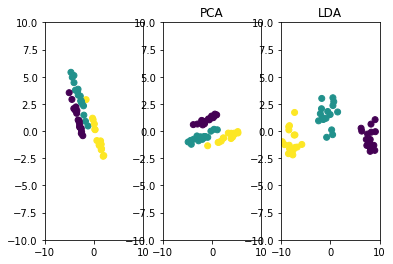

In [57]:
X = d2

modelPCA = PCA(n_components=2)
Xpca = modelPCA.fit_transform(X)

modelLDA = LinearDiscriminantAnalysis(n_components=2)
Xlda = modelLDA.fit_transform(X,y)

plt.figure()
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.subplot(1,3,2)
plt.scatter(Xpca[:,0],Xpca[:,1],c=y)
plt.title('PCA')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.subplot(1,3,3)
plt.scatter(Xlda[:,0],Xlda[:,1],c=y)
plt.title('LDA')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

# Example 2

In [60]:
X,y = load_digits(return_X_y=True)
print('X',X.shape)

X (1797, 64)


In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
modelPCA = PCA(n_components=2)
modelPCA.fit(Xtrain)
Xpca = modelPCA.transform(Xtrain)

In [71]:
modelLDA = LinearDiscriminantAnalysis(n_components=2)
modelLDA.fit(Xtrain,ytrain)
Xlda = modelLDA.transform(Xtrain)

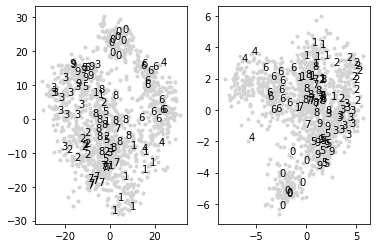

In [72]:
idx = np.random.permutation(len(Xtrain))[:100]

plt.figure()
plt.subplot(1,2,1)
plt.plot(Xpca[:,0],Xpca[:,1],'.',color='lightgray')
for i in idx:
    plt.text(Xpca[i,0],Xpca[i,1],str(ytrain[i]))

plt.subplot(1,2,2)
plt.plot(Xlda[:,0],Xlda[:,1],'.',color='lightgray')
for i in idx:
    plt.text(Xlda[i,0],Xlda[i,1],str(ytrain[i]))
plt.show()